
# 1: Load the Dataset

In [2]:

# Import necessary libraries
import pandas as pd

# Load the dataset
url ="/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2 Basic Dataset Information

In [3]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 TotalCharges is wrongly stored as text instead of numbers.

# 3: Check for Missing Values

In [4]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values

# 4: Summary Statistics

In [5]:
# Get summary statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


tenure: 0–72 months, 
MonthlyCharges: $18.25–$118.75.

# 5: Fix the TotalCharges Column

In [6]:
# Convert TotalCharges to numeric, handling errors by coercing invalid values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values in TotalCharges after conversion
df['TotalCharges'].isnull().sum()

11

Converted to numeric; found 11 missing values

# 6: Handle Missing Values in TotalCharges

In [7]:
# Fill missing values in TotalCharges with 0 (assuming missing values are for new customers)
df['TotalCharges'].fillna(0, inplace=True)

# Verify that there are no missing values left
df['TotalCharges'].isnull().sum()

<ipython-input-7-273310268ddc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


0

Filled missing TotalCharges with 0.

# 7: Explore the Target Variable (Churn)

In [8]:
# Check the distribution of the target variable
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

73.46% stayed, 26.54% churned (imbalanced, may need balancing).

# 8: Encode Categorical Variables

In [9]:
# Drop the 'customerID' column as it is not useful for modeling
df.drop(columns=['customerID'], inplace=True)

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first 5 rows of the encoded dataset
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


# 9: Analyze Correlation with Churn

In [10]:
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Display correlation of features with Churn_Yes
correlation_matrix['Churn_Yes'].sort_values(ascending=False)

Churn_Yes                                1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


More likely to churn: Fiber optic internet, electronic check payments, high monthly charges.


Less likely to churn: Longer tenure, two-year contracts, higher total charges.

# 10: Visualize Key Relationships

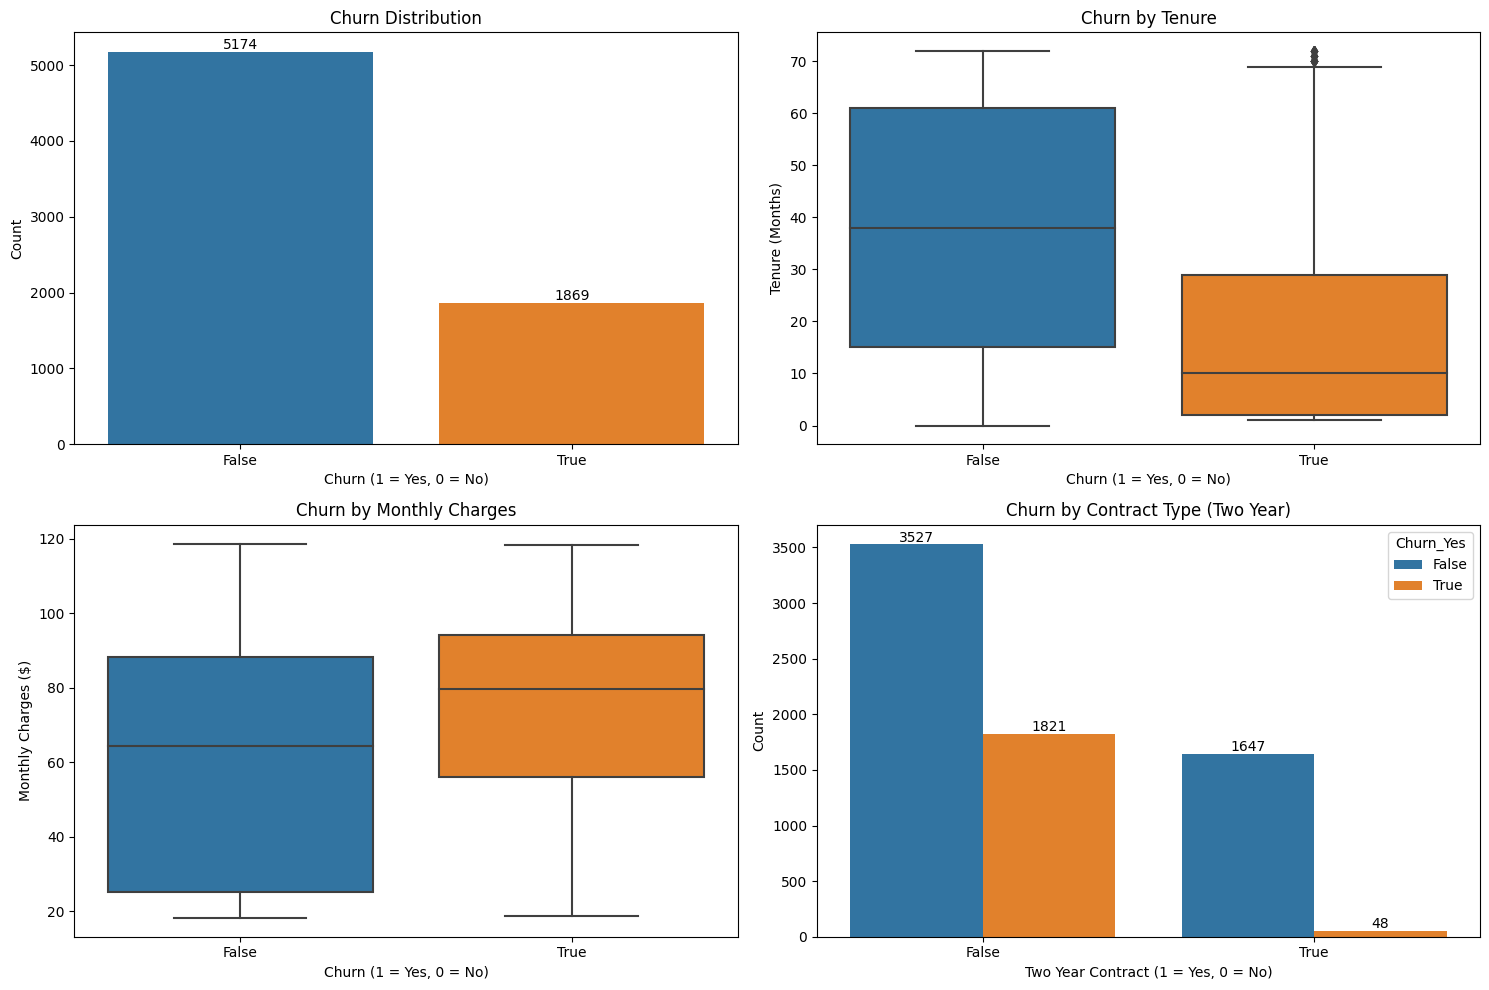

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Plot 1: Churn distribution
plt.subplot(2, 2, 1)
ax1 = sns.countplot(x='Churn_Yes', data=df_encoded)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Add total counts on top of the bars
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Plot 2: Churn by Tenure
plt.subplot(2, 2, 2)
sns.boxplot(x='Churn_Yes', y='tenure', data=df_encoded)
plt.title('Churn by Tenure')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Tenure (Months)')

# Plot 3: Churn by Monthly Charges
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df_encoded)
plt.title('Churn by Monthly Charges')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Monthly Charges ($)')

# Plot 4: Churn by Contract Type
plt.subplot(2, 2, 4)
ax4 = sns.countplot(x='Contract_Two year', hue='Churn_Yes', data=df_encoded)
plt.title('Churn by Contract Type (Two Year)')
plt.xlabel('Two Year Contract (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Add total counts on top of the bars
for p in ax4.patches:
    ax4.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# 11: Feature Importance

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 10 features
feature_importances.head(10)

TotalCharges                      0.192685
tenure                            0.176365
MonthlyCharges                    0.173873
InternetService_Fiber optic       0.038952
PaymentMethod_Electronic check    0.034998
Contract_Two year                 0.031087
gender_Male                       0.027832
OnlineSecurity_Yes                0.027045
PaperlessBilling_Yes              0.025531
TechSupport_Yes                   0.023293
dtype: float64

### Feature Importance Summary
Top Factors Reducing Churn: Higher TotalCharges, tenure, two-year contracts, online security, and tech support.

Top Factors Increasing Churn: High MonthlyCharges, fiber optic internet, electronic check payments, and paperless billing.

Minor Impact: Gender (males slightly more likely to churn).

# 12: Split the Data

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 30)
Testing set shape: (1409, 30)


# 13: Use Balanced Random Forest

In [15]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Balanced Random Forest model
brf = BalancedRandomForestClassifier(random_state=42)

# Train the model on the training set
brf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = brf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.73      0.81      1036
        True       0.52      0.82      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409


Confusion Matrix:
[[752 284]
 [ 67 306]]


# 14: Fine-Tune Balanced Random Forest

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=brf, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best F1-Score: 0.6288354175866331


# 15: Try EasyEnsemble

In [17]:
from imblearn.ensemble import EasyEnsembleClassifier

# Initialize the EasyEnsemble model
easy_ensemble = EasyEnsembleClassifier(random_state=42, n_estimators=10)

# Train the model on the training set
easy_ensemble.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ee = easy_ensemble.predict(X_test)

# Evaluate the model
print("Classification Report (EasyEnsemble):")
print(classification_report(y_test, y_pred_ee))

print("\nConfusion Matrix (EasyEnsemble):")
print(confusion_matrix(y_test, y_pred_ee))

Classification Report (EasyEnsemble):
              precision    recall  f1-score   support

       False       0.93      0.72      0.81      1036
        True       0.52      0.85      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.79      0.73      1409
weighted avg       0.82      0.76      0.77      1409


Confusion Matrix (EasyEnsemble):
[[747 289]
 [ 55 318]]


# 16:  XGBoost

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

# Train the model on the training set
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

Classification Report (XGBoost):
              precision    recall  f1-score   support

       False       0.88      0.81      0.84      1036
        True       0.56      0.70      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409


Confusion Matrix (XGBoost):
[[834 202]
 [113 260]]


# 17: Feature Importance from XGBoost

In [19]:
# Get feature importances
feature_importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 10 features
print("Top 10 Features (XGBoost):")
print(feature_importances_xgb.head(10))

Top 10 Features (XGBoost):
Contract_Two year                 0.435267
InternetService_Fiber optic       0.188769
Contract_One year                 0.112806
StreamingMovies_Yes               0.029135
InternetService_No                0.025089
PhoneService_Yes                  0.022134
PaymentMethod_Electronic check    0.015769
tenure                            0.015654
MultipleLines_Yes                 0.014163
StreamingTV_Yes                   0.013721
dtype: float32


# 20: Generate Model Comparison Table

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model and return metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Churn)": precision_score(y_test, y_pred, pos_label=True),
        "Recall (Churn)": recall_score(y_test, y_pred, pos_label=True),
        "F1-Score (Churn)": f1_score(y_test, y_pred, pos_label=True)
    }

# Evaluate all models
results = [
    evaluate_model(brf, X_test, y_test, "Balanced Random Forest"),
    evaluate_model(easy_ensemble, X_test, y_test, "EasyEnsemble"),
    evaluate_model(xgb, X_test, y_test, "XGBoost")
]

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision (Churn)  Recall (Churn)  \
0  Balanced Random Forest  0.750887           0.518644        0.820375   
1            EasyEnsemble  0.755855           0.523888        0.852547   
2                 XGBoost  0.776437           0.562771        0.697051   

   F1-Score (Churn)  
0          0.635514  
1          0.648980  
2          0.622754  


# 21: Visualize the Comparison


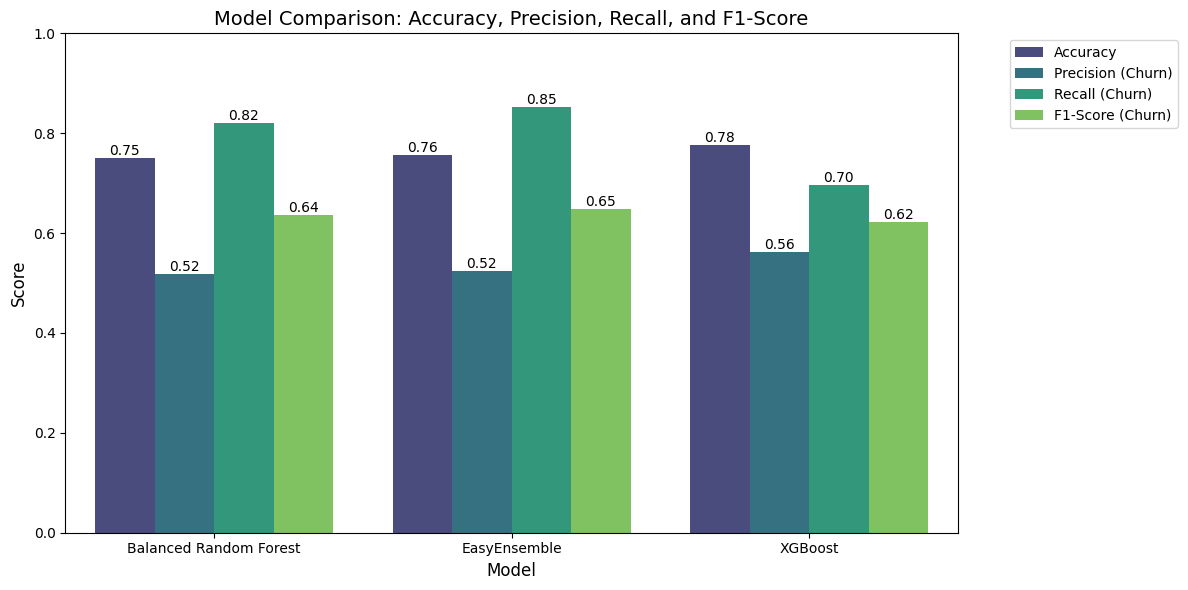

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a bar plot
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted, palette="viridis")

# Add counts (scores) on top of the bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",  # Format the score to 2 decimal places
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the annotation
        ha="center", va="center", fontsize=10, color="black", xytext=(0, 5),
        textcoords="offset points"
    )

# Add labels and title
plt.title("Model Comparison: Accuracy, Precision, Recall, and F1-Score", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 22: Save the Trained Model

In [23]:
import joblib

# Save the XGBoost model to a file
model_filename = "xgboost_churn_model.pkl"
joblib.dump(xgb, model_filename)

print(f"Model saved to {model_filename}")

Model saved to xgboost_churn_model.pkl
